## Benchmarking results

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [115]:
def get_df(filename):
    df = pd.read_csv(filename)
    df = df[df['data_size'] == 2147483648] # adjustable
    return df

def total_time(filename):
    df = get_df(filename)
    total_df = df[['scan time', 'execute_query time']].sum(axis=0)
    scan_min = round(total_df['scan time'] / (60 * 1000), 2)
    execute_query_min = round(total_df['execute_query time'] / (60 * 1000), 2)
    total_min = scan_min + execute_query_min
    print('Scan time: {} min, ExecuteQuery: {} min, Total: {} min'.format(scan_min, execute_query_min, total_min))
    
def survey(filename):
    df = get_df(filename)
    df_mean = df.groupby(['data_size', 'block_size', 'upper_bound','scan thread number', ' execute_query thread number']).mean()
    return df_mean

In [94]:
print('RoundRobin survey:')
total_time('log_round_robin_01.csv')
print('OneDisk survey:')
total_time('log_one_disk_01.csv')

RoundRobin survey:
Scan time: 14.84 min, ExecuteQuery: 43.46 min, Total: 58.3 min
OneDisk survey:
Scan time: 99.29 min, ExecuteQuery: 79.33 min, Total: 178.62 min


In [95]:
survey('log_round_robin_01.csv')

scan time  \
data_size  block_size upper_bound scan thread number  execute_query thread number              
1073741824 512        22          1                  1                             22647.750   
                                  2                  2                             11420.250   
                                  4                  4                              5974.875   
                                  8                  8                              3646.250   
                                  16                 16                             7639.375   
           1024       22          1                  1                             11783.750   
                                  2                  2                              5992.250   
                                  4                  4                              3177.750   
                                  8                  8                              2275.000   
                                  16                 16                             4418.250   
           2048       22          1                  1                              6690.500   
                                  2                  2                              3428.500   
                                  4                  4                              1907.750   
                                  8                  8                              1118.375   
                                  16                 16                             2261.250   
           4096       22          1                  1                              4545.250   
                                  2                  2                              2150.875   
                                  4                  4                              1174.500   
                                  8                  8                              1407.000   
                                  16                 16                             1198.125   
           8192       22          1                  1                              2993.000   
                                  2                  2                              1353.500   
                                  4                  4                               803.250   
                                  8                  8                               637.500   
                                  16                 16                              685.125   

                                                                                   execute_query time  
data_size  block_size upper_bound scan thread number  execute_query thread number                      
1073741824 512        22          1                  1                                      70230.875  
                                  2                  2                                      46949.000  
                                  4                  4                                      24285.375  
                                  8                  8                                      13281.750  
                                  16                 16                                      6932.625  
           1024       22          1                  1                                      38250.875  
                                  2                  2                                      23688.625  
                                  4                  4                                      12223.125  
                                  8                  8                                       6657.750  
                                  16                 16                                      3523.625  
           2048       22          1                  1                                      19285.000  
                                  2                  2                                      12165.500  
                                  

In [96]:
survey('log_one_disk_01.csv')

scan time  \
data_size  block_size upper_bound scan thread number  execute_query thread number               
1073741824 512        22          1                  1                             193072.750   
                                  2                  2                              97029.000   
                                  4                  4                              49002.750   
                                  8                  8                              25188.000   
                                  16                 16                             13758.625   
           1024       22          1                  1                              97216.625   
                                  2                  2                              48838.500   
                                  4                  4                              24842.875   
                                  8                  8                              12812.875   
                                  16                 16                              6988.625   
           2048       22          1                  1                              48921.000   
                                  2                  2                              24631.750   
                                  4                  4                              12459.625   
                                  8                  8                               6389.500   
                                  16                 16                              3456.750   
           4096       22          1                  1                              25930.125   
                                  2                  2                              13082.375   
                                  4                  4                               6613.375   
                                  8                  8                               3356.625   
                                  16                 16                              1786.875   
           8192       22          1                  1                              14960.375   
                                  2                  2                               7549.000   
                                  4                  4                               3829.750   
                                  8                  8                               1927.625   
                                  16                 16                              1037.875   

                                                                                   execute_query time  
data_size  block_size upper_bound scan thread number  execute_query thread number                      
1073741824 512        22          1                  1                                     150354.750  
                                  2                  2                                      77947.750  
                                  4                  4                                      39204.375  
                                  8                  8                                      19944.375  
                                  16                 16                                     10832.125  
           1024       22          1                  1                                      77081.375  
                                  2                  2                                      39203.250  
                                  4                  4                                      19975.250  
                                  8                  8                                      10267.375  
                                  16                 16                                      5509.750  
           2048       22          1                  1                                      40413.750  
                                  2                  2                                      20330.500  
        

In [104]:
def setup_axes(ax, xlabel, ylabel):
    for i in range(len(ax)):
        ax[i].legend()
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].set_xlabel(xlabel, fontsize=12)
        ax[i].set_ylabel(ylabel, fontsize=12)
        
def main_info(filename):
    df = get_df(filename)
    
    df_main = df[['block_size', 'scan thread number', 'scan time', 'execute_query time', 'upper_bound']]
    df_grouped = df_main.groupby(['block_size', 'scan thread number', 'upper_bound']).mean()

    block_sizes = []
    thread_numbers = []
    upper_bounds = []
    index_list = df_grouped.index.values.tolist()

    for block_size, thread_number, upper_bound in index_list:
        if block_size not in block_sizes:
            block_sizes.append(block_size)
        if thread_number not in thread_numbers:
            thread_numbers.append(thread_number)
        if upper_bound not in upper_bounds:
            upper_bounds.append(upper_bound)
            
    return df, df_main, block_sizes, thread_numbers, upper_bounds
    
def block_size_to_time_relation(filename):
    df, df_main, block_sizes, thread_numbers, _ = main_info(filename)   

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    for thread_number in thread_numbers:
        df_bs = df_main[df_main['scan thread number'] == thread_number].groupby('block_size').mean()
        ax[0].plot(df_bs['scan time'], label='{} threads'.format(thread_number))
        ax[1].plot(df_bs['execute_query time'], label='{} threads'.format(thread_number))

    setup_axes(ax, 'block size', 'time, ms')
    ax[0].set_xticks(block_sizes)
    ax[0].set_xticklabels([str(block_size) for block_size in block_sizes])
    ax[1].set_xticks(block_sizes)
    ax[1].set_xticklabels([str(block_size) for block_size in block_sizes])
    ax[0].set_title('Scan time', fontsize=16)
    ax[1].set_title('ExecuteQuery time', fontsize=16)
    plt.suptitle('Block size and time to run relation', fontsize=18) 
    
    
def thread_number_to_time_relation(filename):
    df, df_main, block_sizes, thread_numbers, _ = main_info(filename)
        
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    for block_size in block_sizes:
        df_bs = df_main[df_main['block_size'] == block_size].groupby('scan thread number').mean()
        ax[0].plot(df_bs['scan time'], label='bs={}'.format(block_size))
        ax[1].plot(df_bs['execute_query time'], label='bs={}'.format(block_size))

    setup_axes(ax, 'thread number', 'time, ms')
    ax[0].set_xticks(thread_numbers)
    ax[0].set_xticklabels([str(thread_number) for thread_number in thread_numbers])
    ax[1].set_xticks(thread_numbers)
    ax[1].set_xticklabels([str(thread_number) for thread_number in thread_numbers])
    ax[0].set_title('Scan time', fontsize=16)
    ax[1].set_title('ExecuteQuery time', fontsize=16)
    plt.suptitle('Thread number and time to run relation', fontsize=18)

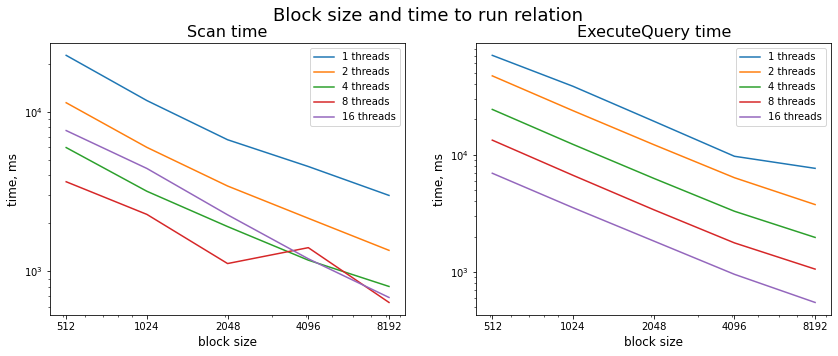

In [105]:
block_size_to_time_relation('log_round_robin_01.csv')

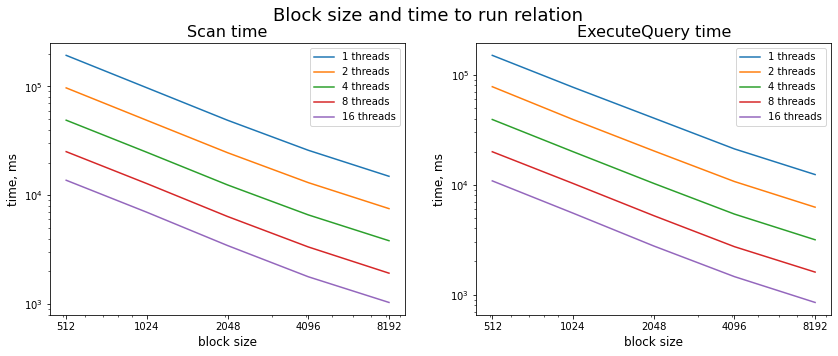

In [106]:
block_size_to_time_relation('log_one_disk_01.csv')

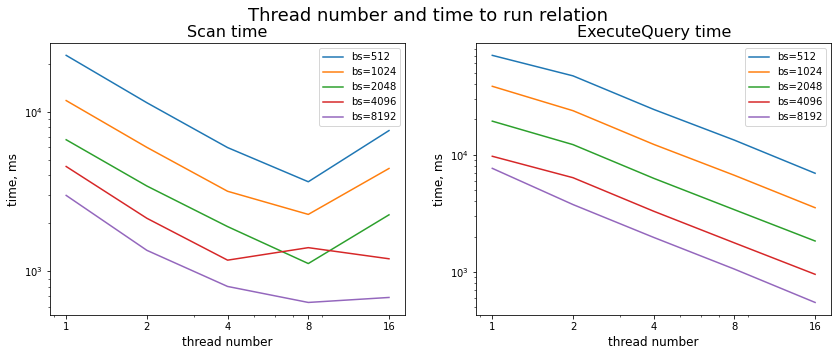

In [107]:
thread_number_to_time_relation('log_round_robin_01.csv')

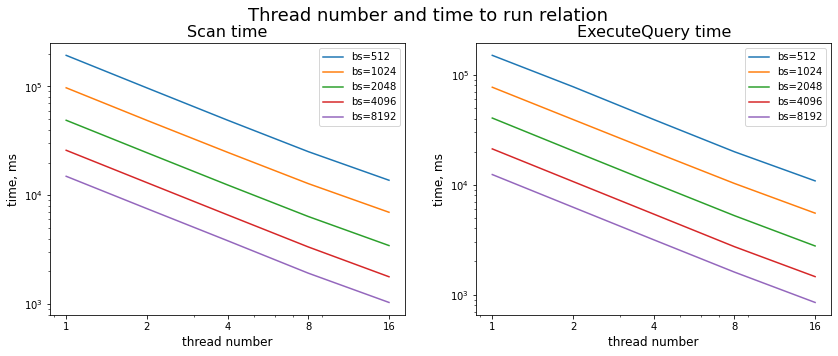

In [108]:
thread_number_to_time_relation('log_one_disk_01.csv')

Text(0, 0.5, 'execute_query time / scan time')

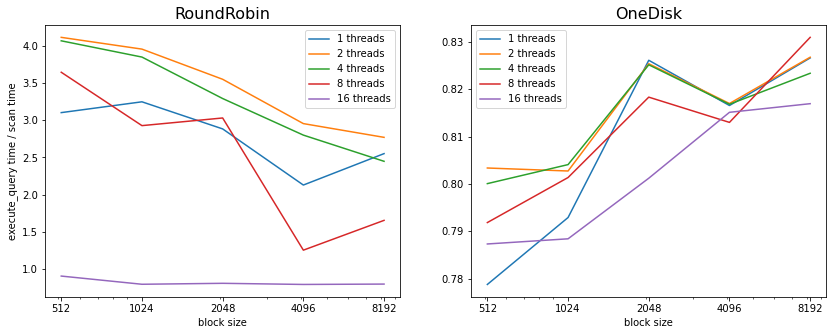

In [110]:
rr, rr_main, block_sizes, thread_numbers, _ = main_info('log_round_robin_01.csv')
od, od_main, block_sizes, thread_numbers, _ = main_info('log_one_disk_01.csv')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
for thread_number in thread_numbers:
    rr_bs = rr_main[rr_main['scan thread number'] == thread_number].groupby('block_size').mean()
    od_bs = od_main[od_main['scan thread number'] == thread_number].groupby('block_size').mean()
    ax[0].plot(rr_bs['execute_query time'] / rr_bs['scan time'], label='{} threads'.format(thread_number))
    ax[1].plot(od_bs['execute_query time'] / od_bs['scan time'], label='{} threads'.format(thread_number))
    

ax[0].legend()
ax[1].legend()
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xlabel('block size')
ax[1].set_xlabel('block size')

ax[0].set_xticks(block_sizes)
ax[0].set_xticklabels([str(block_size) for block_size in block_sizes])
ax[1].set_xticks(block_sizes)
ax[1].set_xticklabels([str(block_size) for block_size in block_sizes])
ax[0].set_title('RoundRobin', fontsize=16)
ax[1].set_title('OneDisk', fontsize=16)
ax[0].set_ylabel('execute_query time / scan time')

## Benchmarks.2
After noticing that using `/scratch` disk for one disk strategy gives strange results, we decided to try using one of `/nvme` disks for one disk placement strategy. Also we decided to try using bigger block sizes to minimize some CPU overhead.

In [111]:
%ls

'Benchmarking results.ipynb'   log_one_disk_02.csv      log_round_robin_02.csv
 expected_ration.csv           log_one_file_02.csv
 log_one_disk_01.csv           log_round_robin_01.csv


In [139]:
print('RoundRobin survey:')
total_time('log_round_robin_02.csv')
print('OneDisk survey:')
total_time('log_one_disk_02.csv')
print('OneFile survey:')
total_time('log_one_file_02.csv')

RoundRobin survey:
Scan time: 66.59 min, ExecuteQuery: 105.54 min, Total: 172.13 min
OneDisk survey:
Scan time: 140.56 min, ExecuteQuery: 164.01 min, Total: 304.57 min
OneFile survey:
Scan time: 111.61 min, ExecuteQuery: 117.61 min, Total: 229.22 min


In [116]:
def setup_axes(ax, xlabel, ylabel):
    for i in range(len(ax)):
        ax[i].legend()
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].set_xlabel(xlabel, fontsize=12)
        ax[i].set_ylabel(ylabel, fontsize=12)
        
    
def block_size_to_time_relation_02(filename, ax):
    df, df_main, block_sizes, thread_numbers, _ = main_info(filename)   

    for thread_number in thread_numbers:
        df_bs = df_main[df_main['scan thread number'] == thread_number].groupby('block_size').mean()
        ax[0].plot(df_bs['scan time'], label='{} threads'.format(thread_number))
        ax[1].plot(df_bs['execute_query time'], label='{} threads'.format(thread_number))

    setup_axes(ax, 'block size', 'time, ms')
    ax[0].set_xticks(block_sizes)
    ax[0].set_xticklabels([str(block_size) for block_size in block_sizes])
    ax[1].set_xticks(block_sizes)
    ax[1].set_xticklabels([str(block_size) for block_size in block_sizes])
    
    
def thread_number_to_time_relation_02(filename, ax):
    df, df_main, block_sizes, thread_numbers, _ = main_info(filename)
        
    for block_size in block_sizes:
        df_bs = df_main[df_main['block_size'] == block_size].groupby('scan thread number').mean()
        ax[0].plot(df_bs['scan time'], label='bs={}'.format(block_size))
        ax[1].plot(df_bs['execute_query time'], label='bs={}'.format(block_size))

    setup_axes(ax, 'thread number', 'time, ms')
    ax[0].set_xticks(thread_numbers)
    ax[0].set_xticklabels([str(thread_number) for thread_number in thread_numbers])
    ax[1].set_xticks(thread_numbers)
    ax[1].set_xticklabels([str(thread_number) for thread_number in thread_numbers])

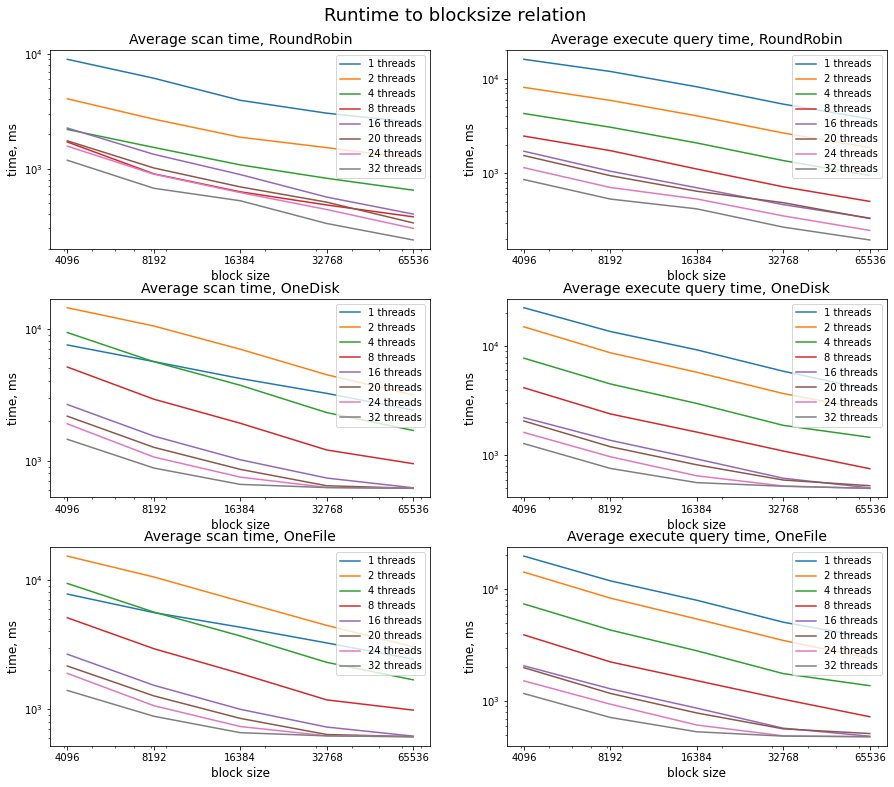

In [117]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.25)
block_size_to_time_relation_02('log_round_robin_02.csv', ax[0])
ax[0][0].set_title('Average scan time, RoundRobin', fontsize=14)
ax[0][1].set_title('Average execute query time, RoundRobin', fontsize=14)
block_size_to_time_relation_02('log_one_disk_02.csv', ax[1])
ax[1][0].set_title('Average scan time, OneDisk', fontsize=14)
ax[1][1].set_title('Average execute query time, OneDisk', fontsize=14)
block_size_to_time_relation_02('log_one_file_02.csv', ax[2])
ax[2][0].set_title('Average scan time, OneFile', fontsize=14)
ax[2][1].set_title('Average execute query time, OneFile', fontsize=14)
plt.suptitle('Runtime to blocksize relation', fontsize=18)
plt.subplots_adjust(top=0.93)

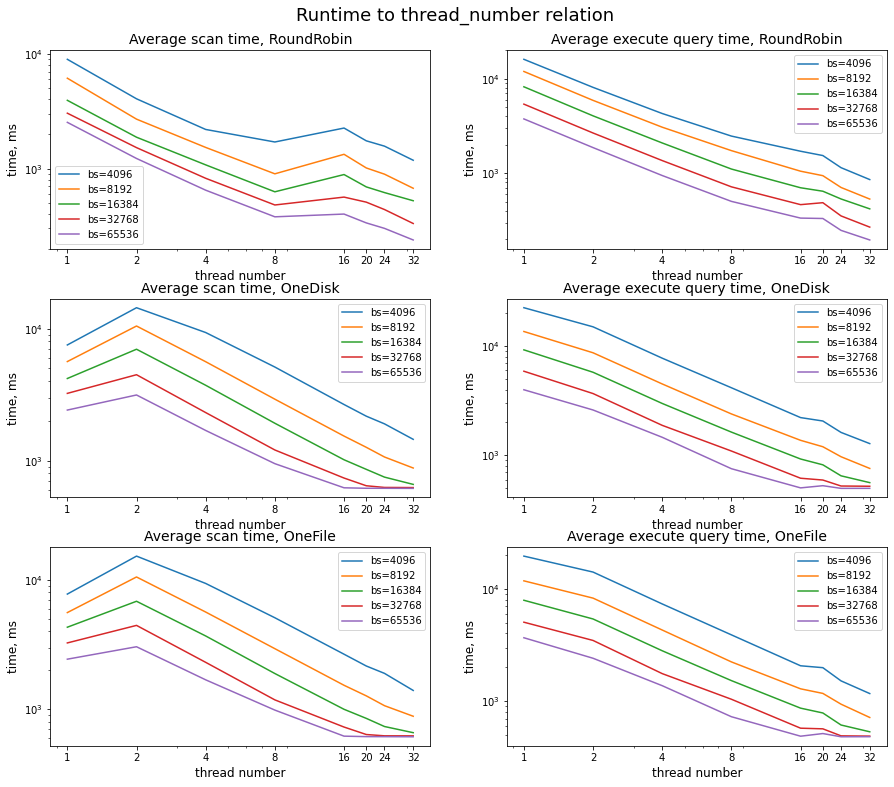

In [118]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.25)
thread_number_to_time_relation_02('log_round_robin_02.csv', ax[0])
ax[0][0].set_title('Average scan time, RoundRobin', fontsize=14)
ax[0][1].set_title('Average execute query time, RoundRobin', fontsize=14)
thread_number_to_time_relation_02('log_one_disk_02.csv', ax[1])
ax[1][0].set_title('Average scan time, OneDisk', fontsize=14)
ax[1][1].set_title('Average execute query time, OneDisk', fontsize=14)
thread_number_to_time_relation_02('log_one_file_02.csv', ax[2])
ax[2][0].set_title('Average scan time, OneFile', fontsize=14)
ax[2][1].set_title('Average execute query time, OneFile', fontsize=14)
plt.suptitle('Runtime to thread_number relation', fontsize=18)
plt.subplots_adjust(top=0.93)

In [125]:
def split_by_upper_bound(filename, upper_bound):
    df = get_df(filename)
    
    df_main = df[['block_size', 'scan thread number', 'scan time', 'execute_query time', 'upper_bound']]
    df_main = df_main[df_main['upper_bound'] == upper_bound]
    df_grouped = df_main.groupby(['block_size', 'scan thread number', 'upper_bound']).mean()

    block_sizes = []
    thread_numbers = []
    upper_bounds = []
    index_list = df_grouped.index.values.tolist()

    for block_size, thread_number, upper_bound in index_list:
        if block_size not in block_sizes:
            block_sizes.append(block_size)
        if thread_number not in thread_numbers:
            thread_numbers.append(thread_number)
        if upper_bound not in upper_bounds:
            upper_bounds.append(upper_bound)
            
    return df_main, df_grouped, block_sizes, thread_numbers, upper_bounds

def get_mean_time(filename, block_size, thread_number, upper_bound):
    df_main, df_grouped, block_sizes, thread_numbers, _ = split_by_upper_bound(filename, upper_bound)
    stamp = df_main[(df_main['block_size'] == block_size) & (df_main['scan thread number'] == thread_number)]
    stamp = stamp[['scan time', 'execute_query time']].mean()
    return stamp['scan time'], stamp['execute_query time']
    
def get_EQ_time(filename, block_size, thread_number, upper_bound):
    scan_time, execute_query_time = get_mean_time(filename, block_size, thread_number, upper_bound)
    return execute_query_time

Let us compare the strategies with different upper bounds.

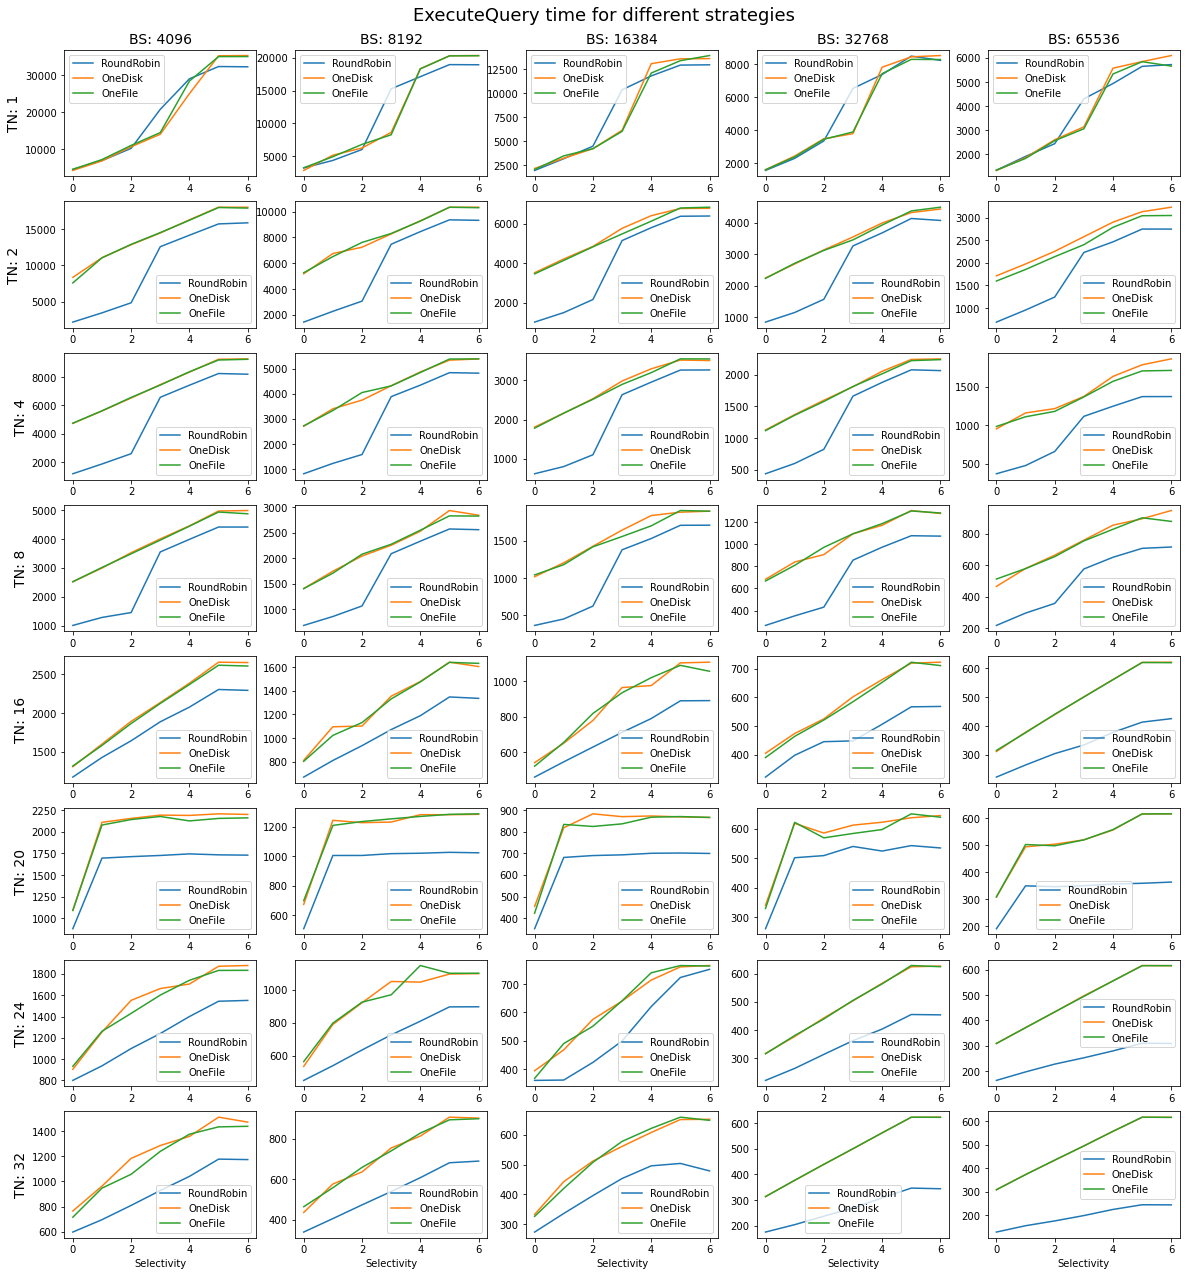

In [138]:
_, _, block_sizes, thread_numbers, upper_bounds = main_info('log_round_robin_02.csv')
fig, ax = plt.subplots(nrows=len(thread_numbers), ncols=len(block_sizes), figsize=(20, 20))

for i, thread_number in enumerate(thread_numbers):
    for j, block_size in enumerate(block_sizes):
        ax[0][j].set_title('BS: {}'.format(block_size), fontsize=14)
        ax[len(thread_numbers) - 1][j].set_xlabel('Selectivity')
        arr_round_robin = []
        arr_one_disk = []
        arr_one_file = []
        for upper_bound in upper_bounds:
            arr_round_robin.append(get_mean_time('log_round_robin_02.csv', block_size, thread_number, upper_bound)[1])
            arr_one_disk.append(get_mean_time('log_one_disk_02.csv', block_size, thread_number, upper_bound)[1])
            arr_one_file.append(get_mean_time('log_one_file_02.csv', block_size, thread_number, upper_bound)[1])
        ax[i][j].plot(arr_round_robin, label='RoundRobin')
        ax[i][j].plot(arr_one_disk, label='OneDisk')
        ax[i][j].plot(arr_one_file, label='OneFile')
        ax[i][j].legend()
    ax[i][0].set_ylabel('TN: {}'.format(thread_number), fontsize=14)
    
plt.suptitle('ExecuteQuery time for different strategies', fontsize=18)
plt.subplots_adjust(top=0.95)

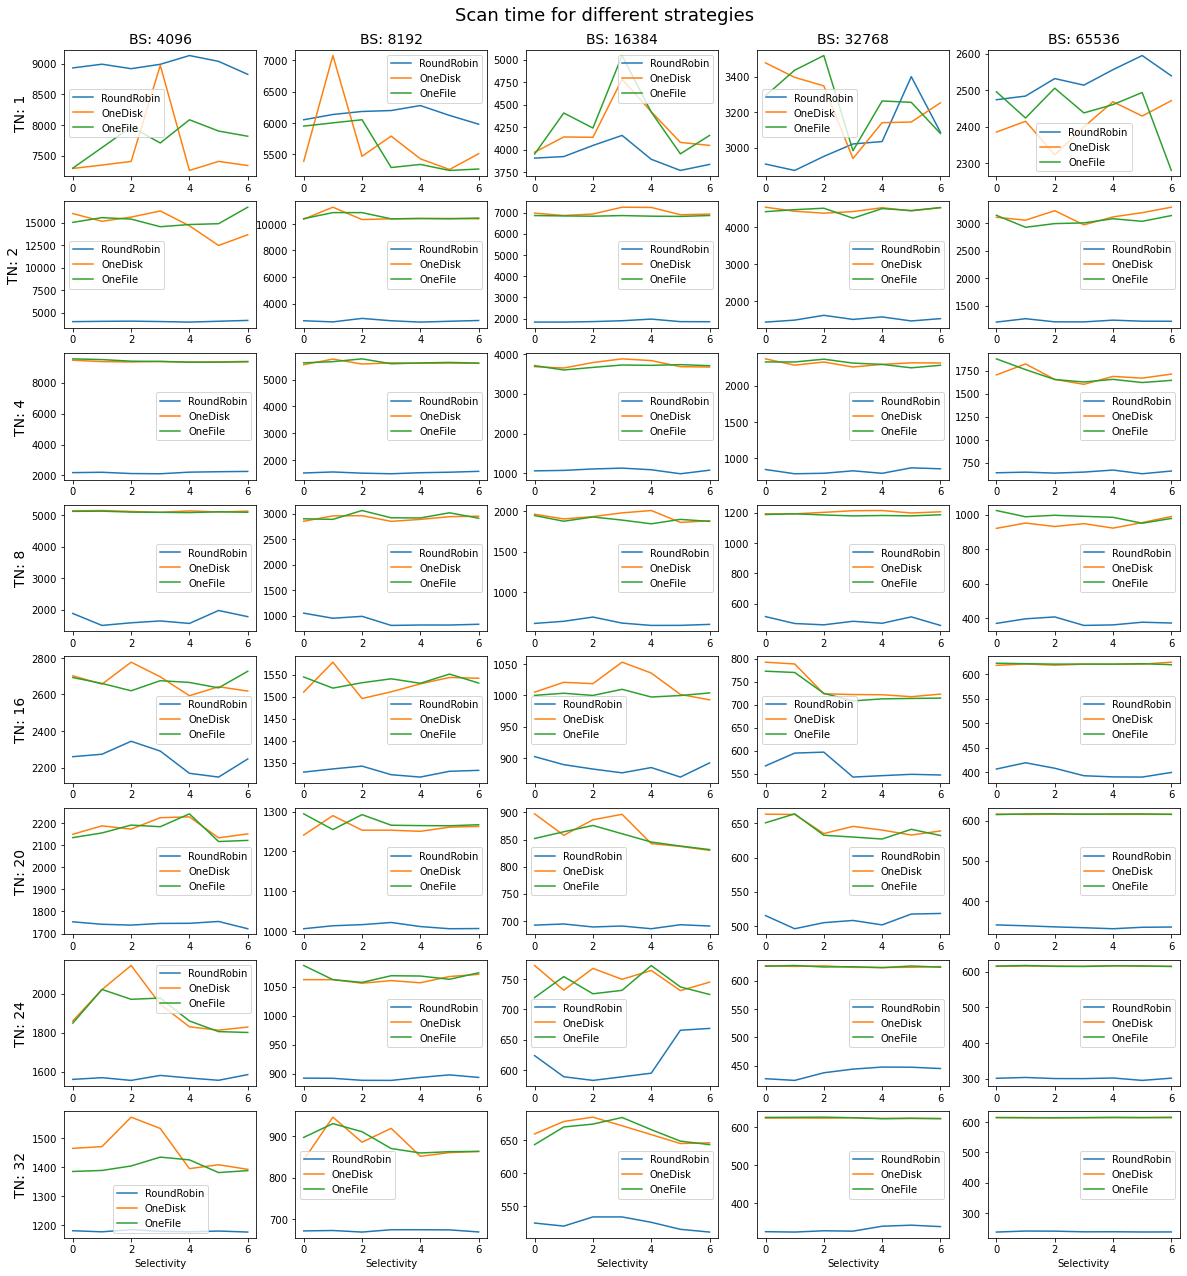

In [137]:
_, _, block_sizes, thread_numbers, upper_bounds = main_info('log_round_robin_02.csv')
fig, ax = plt.subplots(nrows=len(thread_numbers), ncols=len(block_sizes), figsize=(20, 20))

for i, thread_number in enumerate(thread_numbers):
    for j, block_size in enumerate(block_sizes):
        ax[0][j].set_title('BS: {}'.format(block_size), fontsize=14)
        ax[len(thread_numbers) - 1][j].set_xlabel('Selectivity')
        arr_round_robin = []
        arr_one_disk = []
        arr_one_file = []
        for upper_bound in upper_bounds:
            arr_round_robin.append(get_mean_time('log_round_robin_02.csv', block_size, thread_number, upper_bound)[0])
            arr_one_disk.append(get_mean_time('log_one_disk_02.csv', block_size, thread_number, upper_bound)[0])
            arr_one_file.append(get_mean_time('log_one_file_02.csv', block_size, thread_number, upper_bound)[0])
        ax[i][j].plot(arr_round_robin, label='RoundRobin')
        ax[i][j].plot(arr_one_disk, label='OneDisk')
        ax[i][j].plot(arr_one_file, label='OneFile')
        ax[i][j].legend()
    ax[i][0].set_ylabel('TN: {}'.format(thread_number), fontsize=14)
    
plt.suptitle('Scan time for different strategies', fontsize=18)
plt.subplots_adjust(top=0.95)

In [145]:
expected_ratios = pd.read_csv('expected_ration.csv')
expected_ratios.head()

,block_size,upper_bound,to_be_loaded,expected_ratio
0,4096,-2,0.000000,0.500000
1,4096,6,0.199856,0.599928
2,4096,14,0.399847,0.699924
3,4096,22,0.599800,0.799900
4,4096,30,0.799837,0.899919


In [156]:
def get_expected_ratio(block_size, upper_bound):
    stamp = expected_ratios[(expected_ratios['block_size'] == block_size) & 
                            (expected_ratios['upper_bound'] == upper_bound)]
    return stamp['expected_ratio'].mean()

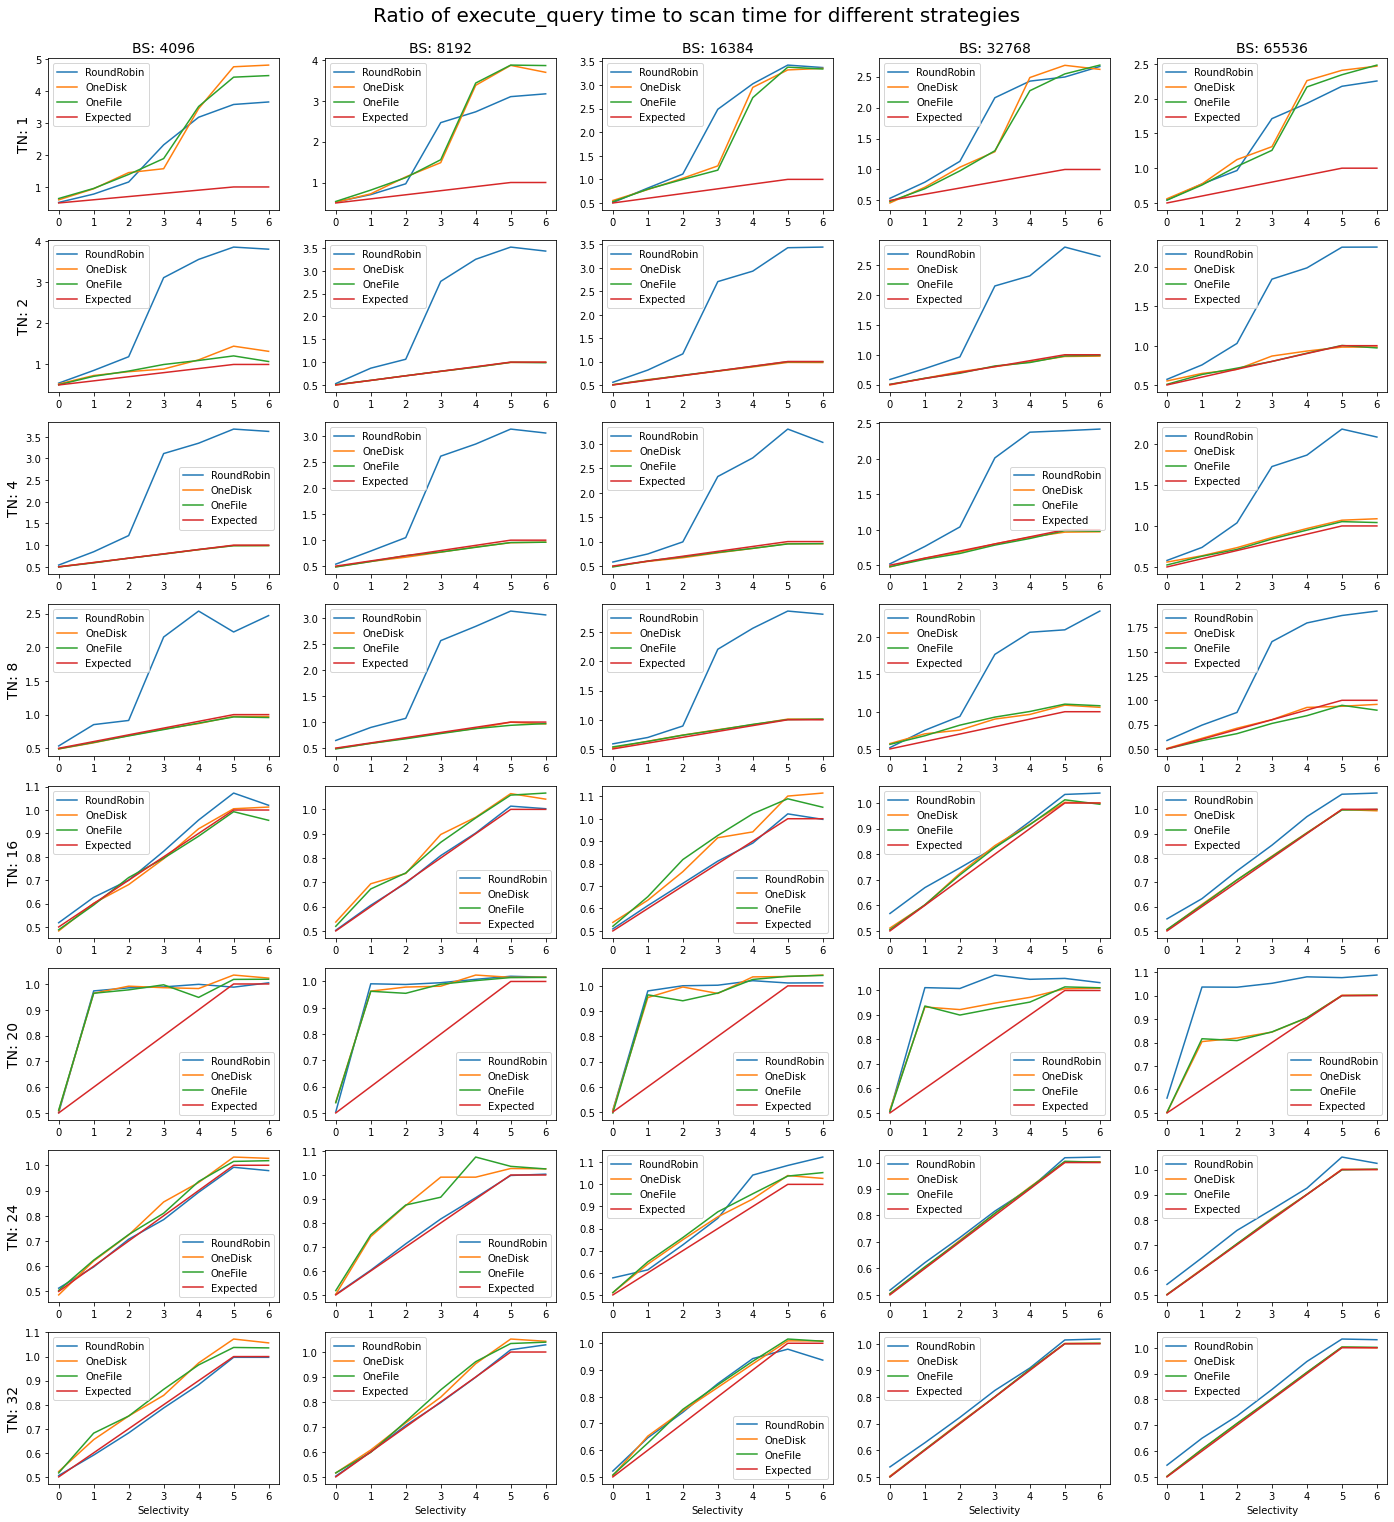

In [161]:
_, _, block_sizes, thread_numbers, upper_bounds = main_info('log_round_robin_02.csv')
fig, ax = plt.subplots(nrows=len(thread_numbers), ncols=len(block_sizes), figsize=(24, 24))

for i, thread_number in enumerate(thread_numbers):
    for j, block_size in enumerate(block_sizes):
        ax[0][j].set_title('BS: {}'.format(block_size), fontsize=14)
        ax[len(thread_numbers) - 1][j].set_xlabel('Selectivity')
        arr_round_robin = []
        arr_one_disk = []
        arr_one_file = []
        arr_expected = []
        for upper_bound in upper_bounds:
            rr_sc, rr_eq = get_mean_time('log_round_robin_02.csv', block_size, thread_number, upper_bound)
            arr_round_robin.append(rr_eq / rr_sc)
            od_sc, od_eq = get_mean_time('log_one_disk_02.csv', block_size, thread_number, upper_bound)
            arr_one_disk.append(od_eq / od_sc)
            of_sc, of_eq = get_mean_time('log_one_file_02.csv', block_size, thread_number, upper_bound)
            arr_one_file.append(of_eq / of_sc)
            arr_expected.append(get_expected_ratio(block_size, upper_bound))
        ax[i][j].plot(arr_round_robin, label='RoundRobin')
        ax[i][j].plot(arr_one_disk, label='OneDisk')
        ax[i][j].plot(arr_one_file, label='OneFile')
        ax[i][j].plot(arr_expected, label='Expected')
        ax[i][j].legend()
    ax[i][0].set_ylabel('TN: {}'.format(thread_number), fontsize=14)
    
plt.suptitle('Ratio of execute_query time to scan time for different strategies', fontsize=20)
plt.subplots_adjust(top=0.95)

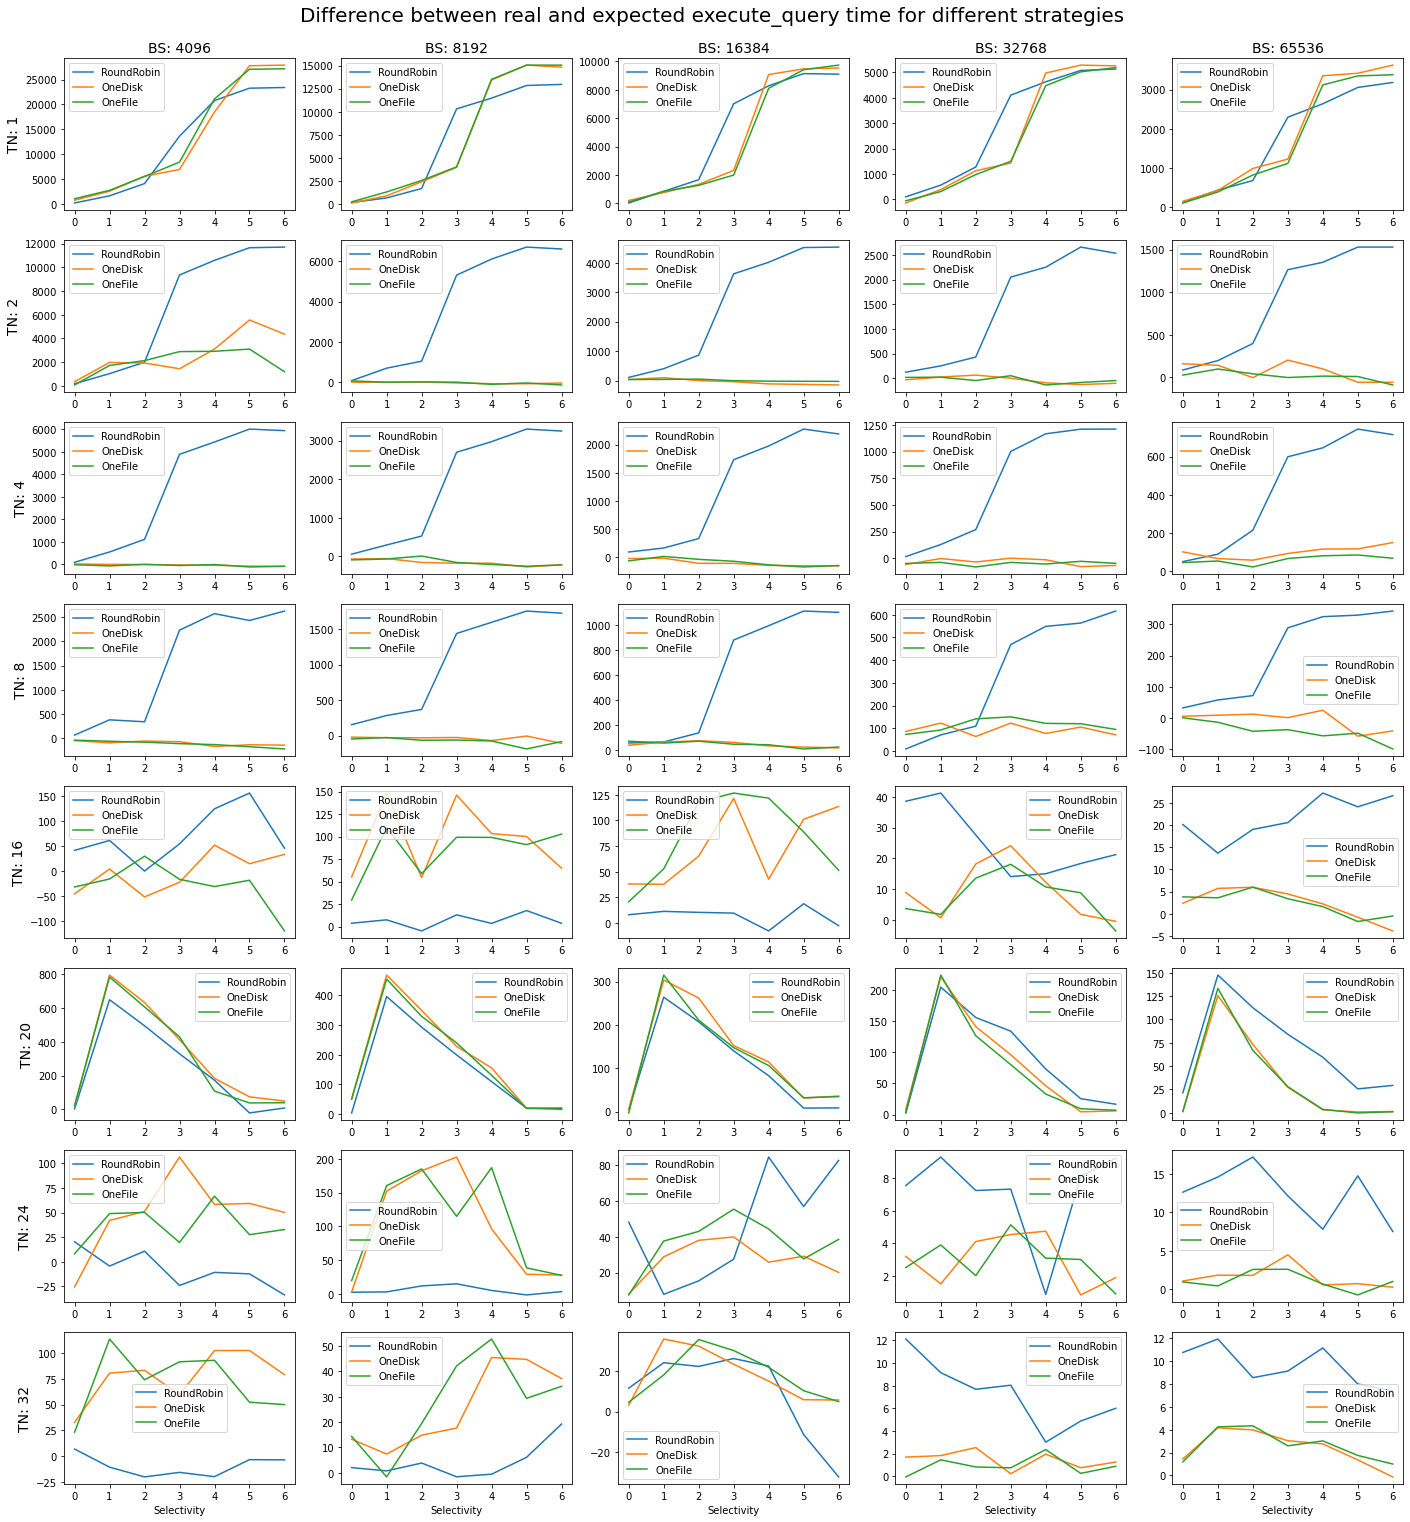

In [162]:
_, _, block_sizes, thread_numbers, upper_bounds = main_info('log_round_robin_02.csv')
fig, ax = plt.subplots(nrows=len(thread_numbers), ncols=len(block_sizes), figsize=(24, 24))

for i, thread_number in enumerate(thread_numbers):
    for j, block_size in enumerate(block_sizes):
        ax[0][j].set_title('BS: {}'.format(block_size), fontsize=14)
        ax[len(thread_numbers) - 1][j].set_xlabel('Selectivity')
        arr_round_robin = []
        arr_one_disk = []
        arr_one_file = []

        for upper_bound in upper_bounds:
            ratio = get_expected_ratio(block_size, upper_bound)
            rr_sc, rr_eq = get_mean_time('log_round_robin_02.csv', block_size, thread_number, upper_bound)
            arr_round_robin.append(rr_eq - rr_sc * ratio)
            od_sc, od_eq = get_mean_time('log_one_disk_02.csv', block_size, thread_number, upper_bound)
            arr_one_disk.append(od_eq - od_sc * ratio)
            of_sc, of_eq = get_mean_time('log_one_file_02.csv', block_size, thread_number, upper_bound)
            arr_one_file.append(of_eq - of_sc * ratio)
            
        ax[i][j].plot(arr_round_robin, label='RoundRobin')
        ax[i][j].plot(arr_one_disk, label='OneDisk')
        ax[i][j].plot(arr_one_file, label='OneFile')
        ax[i][j].legend()
    ax[i][0].set_ylabel('TN: {}'.format(thread_number), fontsize=14)
    
plt.suptitle('Difference between real and expected execute_query time for different strategies', fontsize=20)
plt.subplots_adjust(top=0.95)

In [218]:
def heatmap_from_benchmark(filename, ax, thread_number):
    data = []

    for block_size in block_sizes:
        data.append([])
        for upper_bound in upper_bounds:
            scan_time, execute_query_time = get_mean_time(filename, block_size, thread_number, upper_bound) 
            data[-1].append(execute_query_time / 1000)

    sns.heatmap(data, annot=True, fmt='0.3g', ax=ax)

    ax.set_xticklabels([str(int(val)) for val in upper_bounds])
    ax.set_yticklabels([str(round(val, 4)) for val in block_sizes])
    ax.set_xlabel('Upper bound', fontsize=12)
    ax.set_ylabel('Block size', fontsize=12)

Text(452.23636363636354, 0.5, 'Block size')

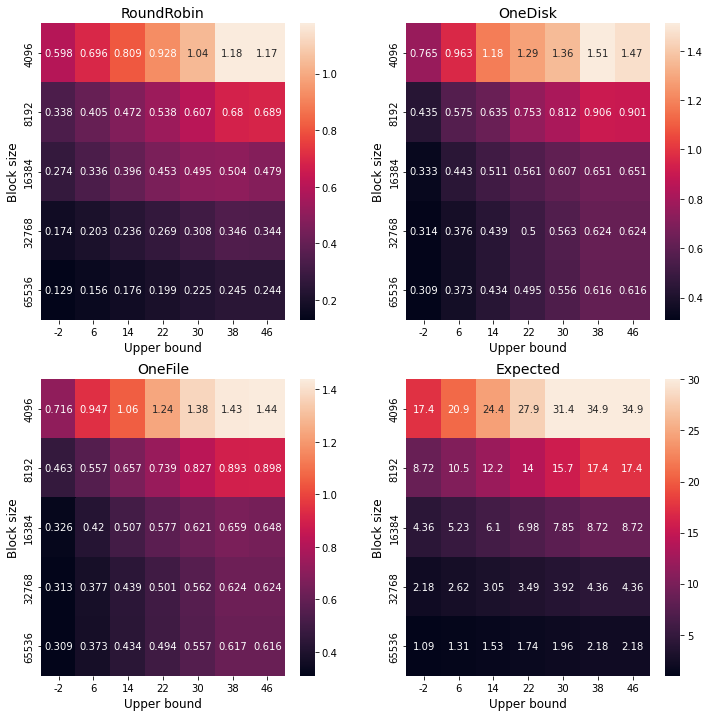

In [220]:
_, _, block_sizes, thread_numbers, upper_bounds = main_info('log_round_robin_02.csv')
thread_number = 32 # change it here to see what happens to others

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

heatmap_from_benchmark('log_round_robin_02.csv', ax[0][0], thread_number)
ax[0][0].set_title('RoundRobin', fontsize=14)

heatmap_from_benchmark('log_one_disk_02.csv', ax[0][1], thread_number)
ax[0][1].set_title('OneDisk', fontsize=14)

heatmap_from_benchmark('log_one_file_02.csv', ax[1][0], thread_number)
ax[1][0].set_title('OneFile', fontsize=14)


data = []

for block_size in block_sizes:
    data.append([])
    for upper_bound in upper_bounds:
        data[-1].append((get_expected_ratio(block_size, upper_bound) / block_size) * (1e6 / 7))

sns.heatmap(data, annot=True, fmt='0.3g', ax=ax[1][1], vmin=1, vmax=30)
ax[1][1].set_title('Expected', fontsize=14)
ax[1][1].set_xticklabels([str(int(val)) for val in upper_bounds])
ax[1][1].set_yticklabels([str(round(val, 4)) for val in block_sizes])
ax[1][1].set_xlabel('Upper bound', fontsize=12)
ax[1][1].set_ylabel('Block size', fontsize=12)